In [8]:
#importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import random

In [9]:
#describe CRISP-DM

# Business understanding – What does the business need?
# Data understanding – What data do we have / need? Is it clean?
# Data preparation – How do we organize the data for modeling?
# Modeling – What modeling techniques should we apply?
# Evaluation – Which model best meets the business objectives?
# Deployment – How do stakeholders access the results?




# Business understanding – What does the business need?
# Determine business objectives: You should first “thoroughly understand, from a business perspective, what the customer really wants to accomplish.” (CRISP-DM Guide) and then define business success criteria.
# Assess situation: Determine resources availability, project requirements, assess risks and contingencies, and conduct a cost-benefit analysis.
# Determine data mining goals: In addition to defining the business objectives, you should also define what success looks like from a technical data mining perspective.
# Produce project plan: Select technologies and tools and define detailed plans for each project phase.

# II. Data Understanding
# Collect initial data: Acquire the necessary data and (if necessary) load it into your analysis tool.
# Describe data: Examine the data and document its surface properties like data format, number of records, or field identities.
# Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.
# Verify data quality: How clean/dirty is the data? Document any quality issues.


# Data Preparation
# Select data: Determine which data sets will be used and document reasons for inclusion/exclusion.
# Clean data: Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.
# Construct data: Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.
# Integrate data: Create new data sets by combining data from multiple sources.
# Format data: Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.

# Modeling
# Select modeling techniques: Determine which algorithms to try (e.g. regression, neural net).
# Generate test design: Pending your modeling approach, you might need to split the data into training, test, and validation sets.
# Build model: As glamorous as this might sound, this might just be executing a few lines of code like “reg = LinearRegression().fit(X, y)”.
# Assess model: Generally, multiple models are competing against each other, and the data scientist needs to interpret the model results based on domain knowledge, the pre-defined success criteria, and the test design.

#Evaluation
# Evaluate results: Do the models meet the business success criteria? Which one(s) should we approve for the business?
# Review process: Review the work accomplished. Was anything overlooked? Were all steps properly executed? Summarize findings and correct anything if needed.
# Determine next steps: Based on the previous three tasks, determine whether to proceed to deployment, iterate further, or initiate new projects.

#Deployment
# Plan deployment: Develop and document a plan for deploying the model.
# Plan monitoring and maintenance: Develop a thorough monitoring and maintenance plan to avoid issues during the operational phase (or post-project phase) of a model.
# Produce final report: The project team documents a summary of the project which might include a final presentation of data mining results.
# Review project: Conduct a project retrospective about what went well, what could have been better, and how to improve in the future.


In [10]:
# For all experiments, you should compare the technical performance on both red and white
# wine datasets.
# You should perform the following experiments:
# • Use supervised and unsupervised methods (see following sections);
# • Randomly remove 10%, 20%, and 30% of the values of the features of each dataset and
# explore two different strategies to handle missing values;
# • Experiment with data normalization, data discretization, and data reduction. Apply
# these steps to the original, unchanged, dataset.
# Don’t forget to visually explore your data, namely presenting correlations between pairs
# of features.
# The technical evaluation should include different metrics and means to better under-
# stand the errors of the supervised machine learning approaches. The assessment of the
# unsupervised machine learning approaches should compare the resulting clusters to clus-
# ters based on the quality score.

file_white_wine = 'winequality-white.csv'
file_red_wine = 'winequality-red.csv'

# Load the data
white_wine = pd.read_csv(file_white_wine, sep=';')
red_wine = pd.read_csv(file_red_wine, sep=';')

# Print the first 5 rows of the data
# print(white_wine.head())
# print(red_wine.head())


# • Randomly remove 10%, 20%, and 30% of the values of the features of each dataset and

white_wine_10 = white_wine.sample(frac=0.1)
white_wine_20 = white_wine.sample(frac=0.2)
white_wine_30 = white_wine.sample(frac=0.3)

red_wine_10 = red_wine.sample(frac=0.1)
red_wine_20 = red_wine.sample(frac=0.2)
red_wine_30 = red_wine.sample(frac=0.3)

# print(white_wine_10.head())



In [11]:
y_white_wine_10 = white_wine_10['quality']
x_white_wine_10 = white_wine_10.drop('quality', axis=1)

print(x_white_wine_10.shape)
print(y_white_wine_10.shape)

y_white_wine_20 = white_wine_20['quality']
x_white_wine_20 = white_wine_20.drop('quality', axis=1)

y_white_wine_30 = white_wine_30['quality']
x_white_wine_30 = white_wine_30.drop('quality', axis=1)

y_red_wine_10 = red_wine_10['quality']
x_red_wine_10 = red_wine_10.drop('quality', axis=1)

y_red_wine_20 = red_wine_20['quality']
x_red_wine_20 = red_wine_20.drop('quality', axis=1)

y_red_wine_30 = red_wine_30['quality']
x_red_wine_30 = red_wine_30.drop('quality', axis=1)



(490, 11)
(490,)


In [16]:
# Supervised Learning Algorithms
# Experiment with the following supervised learning algorithms and comment the results,
# based on your knowledge of how they work.
# 1. Decision Trees;
# 2. Multi-layer perceptron;

# 1. Decision Trees

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score


def runDecisonTreeClassifier(x_train, y_train, x_test, y_test):
    # Create a decision tree classfifer object
    classfifer = DecisionTreeClassifier(random_state=0)

    # Train the model using the training sets
    classfifer.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = classfifer.predict(x_test)

    # Accuracy
    accuracy = classfifer.score(x_test, y_test)
    print("Decision Tree Accuracy: ", accuracy)



In [13]:
# 2. Multi-layer perceptron;

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


def runMultiLayerPerceptron(x_train, y_train, x_test, y_test):
    # Create a MLP classifier object
    param_grid = [
            {
                'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                'solver' : ['lbfgs', 'sgd', 'adam'],
                'hidden_layer_sizes': [
                (1,),(2,),(3,),(4,)
                ]
            }
        ]

    classifier = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                            scoring='accuracy')
    classifier.fit(x_train,y_train)

    
    print("Best parameters set found on development set:")
    print(classifier.best_params_)

    # Make predictions using the testing set
    y_pred = classifier.predict(x_test)

    # Accuracy
    accuracy = classifier.score(x_test, y_test)
    print("Multi-layer Perceptron Accuracy: ", accuracy)




In [14]:
# 3. k-NN.

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

def runKnnClassifier(x_train, y_train, x_test, y_test):
    # Create a MLP Classifier object
    classifier = KNeighborsClassifier(n_neighbors=5)

    # Train the model using the training sets
    classifier.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = classifier.predict(x_test)

    # Accuracy
    accuracy = classifier.score(x_test, y_test)
    print("k-NN Accuracy: ", accuracy)
    

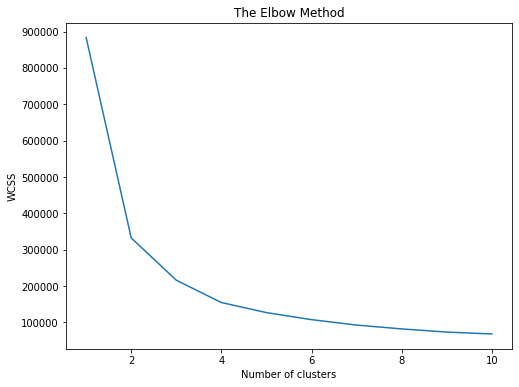

--- 0.026273250579833984 seconds ---
Silhouette score:  0.4921564709599825


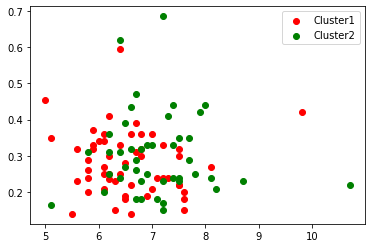

In [58]:
# Unsupervised learning algorithms
# Experiment with the following unsupervised learning algorithms and comment the results,
# based on your knowledge of how they work.
# 1. k-Means;
# 2. DBScan;
# 3. Agglomerative hierarchical clustering.

# 1. k-Means



#import libraries
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
    #evaluate model
from sklearn import metrics
from sklearn.metrics import pairwise_distances

def findBestK(x_train, x_test):
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
        kmeans.fit(x_train)
        wcss.append(kmeans.inertia_)
    f3, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1,11),wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    # To determine the optimal number of clusters, 
    # we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. 
    # Thus for the given data, we conclude that the optimal number of clusters for the data is 2. 

    #Applying kmeans to the dataset, set k=2
    kmeans = KMeans(n_clusters = 2)
    start_time = time.time()
    clusters = kmeans.fit_predict(x_test)
    print("--- %s seconds ---" % (time.time() - start_time))
    labels = kmeans.labels_
    # print(labels)
    #2D plot
    x_test = x_test.values
    colors = 'rgbkcmy'
    for i in np.unique(clusters):
        plt.scatter(x_test[clusters==i, 0],
                x_test[clusters==i, 1],
                color=colors[i], label='Cluster' + str(i+1))
    plt.legend()



    silhouette_score = metrics.silhouette_score(x_test, labels, metric='euclidean')
    print("Silhouette score: ", silhouette_score)
    # TODO  PCA (principle component analysis).
from sklearn.model_selection import train_test_split

x_train_white_10, x_test_white_10, y_train_white_10, y_test_white_10 = train_test_split(x_white_wine_10, y_white_wine_10, test_size=0.2, random_state=0)

# print(white_wine_10.columns.values, 0.2)
findBestK(x_train_white_10, x_test_white_10)



In [ ]:
# 2. DBScan

import numpy as np
from sklearn.cluster import DBSCAN


def runDBScanClustering(x_train, y_train):

    # Compute DBSCAN using Iris dataset
    db = DBSCAN(eps=0.05, min_samples=10).fit(x_train)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)
    # Plot result
    # import matplotlib.pyplot as plt

    # # Black removed and is used for noise instead.
    # unique_labels = set(labels)
    # colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    # for k, col in zip(unique_labels, colors):
    #     if k == -1:
    #         # Black used for noise.
    #         col = 'k'

    #     class_member_mask = (labels == k)

    #     xy = X[class_member_mask & core_samples_mask]
    #     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
    #             markeredgecolor='k', markersize=14)

    #     xy = X[class_member_mask & ~core_samples_mask]
    #     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
    #             markeredgecolor='k', markersize=6)

    # plt.title('Estimated number of clusters: %d' % n_clusters_)
    # plt.show()
    # Todo: Algum metodo para definir a accuracy dos clusters em relacao ao dataset original.


from sklearn.model_selection import train_test_split

x_train_white_10, x_test_white_10, y_train_white_10, y_test_white_10 = train_test_split(x_white_wine_10, y_white_wine_10, test_size=0.2, random_state=0)

runDBScanClustering(x_train_white_10, y_train_white_10)


Estimated number of clusters: 0


In [ ]:
# 3. Agglomerative hierarchical clustering.

import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error, r2_score


def runAgglomerativeHierarchicalClustering(x_train, y_train, x_test, y_test):
    # Create a Agglomerative hierarchical classifier object
    classifier = AgglomerativeClustering(n_clusters=3)

    # Train the model using the training sets
    classifier.fit(x_train)

    # Make predictions using the testing set
    y_pred = classifier.predict(x_test)

    # Accuracy
    accuracy = classifier.score(x_test, y_test)
    print("Agglomerative Hierarchical Clustering Accuracy: ", accuracy)


In [19]:
# Supervised learning algorithms

#test train split
from sklearn.model_selection import train_test_split

x_train_white_10, x_test_white_10, y_train_white_10, y_test_white_10 = train_test_split(x_white_wine_10, y_white_wine_10, test_size=0.2, random_state=0)

print("For white wine quality 10% of data")

print("Supervised Learning Algorithms")
runDecisonTreeClassifier(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runMultiLayerPerceptron(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
runKnnClassifier(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)

print("Unsupervised Learning Algorithms")
# runKMeans(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runDBScan(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runAgglomerativeHierarchicalClustering(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)


x_train_white_20, x_test_white_20, y_train_white_20, y_test_white_20 = train_test_split(x_white_wine_20, y_white_wine_20, test_size=0.2, random_state=0)

print("For white wine quality 20% of data")

print("Supervised Learning Algorithms")
runDecisonTreeClassifier(x_train_white_20, y_train_white_20, x_test_white_20, y_test_white_20)
runMultiLayerPerceptron(x_train_white_20, y_train_white_20, x_test_white_20, y_test_white_20)
runKnnClassifier(x_train_white_20, y_train_white_20, x_test_white_20, y_test_white_20)

print("Unsupervised Learning Algorithms")
# runKMeans(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runDBScan(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runAgglomerativeHierarchicalClustering(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)


x_train_white_30, x_test_white_30, y_train_white_30, y_test_white_30 = train_test_split(x_white_wine_30, y_white_wine_30, test_size=0.2, random_state=0)

print("For white wine quality 30% of data")

print("Supervised Learning Algorithms")
runDecisonTreeClassifier(x_train_white_30, y_train_white_30, x_test_white_30, y_test_white_30)
runMultiLayerPerceptron(x_train_white_30, y_train_white_30, x_test_white_30, y_test_white_30)
runKnnClassifier(x_train_white_30, y_train_white_30, x_test_white_30, y_test_white_30)

print("Unsupervised Learning Algorithms")
# runKMeans(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runDBScan(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
# runAgglomerativeHierarchicalClustering(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)



For white wine quality 10% of data
Supervised Learning Algorithms
Decision Tree Accuracy:  0.5204081632653061
k-NN Accuracy:  0.29591836734693877
Unsupervised Learning Algorithms
For white wine quality 20% of data
Supervised Learning Algorithms
Decision Tree Accuracy:  0.42857142857142855


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_

Best parameters set found on development set:
{'activation': 'identity', 'hidden_layer_sizes': (1,), 'solver': 'lbfgs'}
Multi-layer Perceptron Accuracy:  0.42857142857142855
k-NN Accuracy:  0.3979591836734694
Unsupervised Learning Algorithms
For white wine quality 30% of data
Supervised Learning Algorithms
Decision Tree Accuracy:  0.46258503401360546


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

Best parameters set found on development set:
{'activation': 'identity', 'hidden_layer_sizes': (2,), 'solver': 'lbfgs'}
Multi-layer Perceptron Accuracy:  0.48639455782312924
k-NN Accuracy:  0.3979591836734694
Unsupervised Learning Algorithms


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        

<AxesSubplot:>

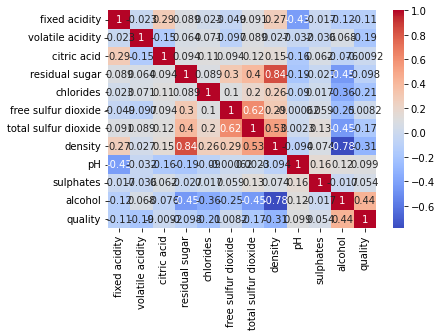

In [37]:
#lets do some preprocessing for the red wine dataset


file_white_wine = 'winequality-white.csv'
file_red_wine = 'winequality-red.csv'

# Load the data
white_wine = pd.read_csv(file_white_wine, sep=';')
red_wine = pd.read_csv(file_red_wine, sep=';')


white_wine.info()
red_wine.info()


# Lets check the data
# print(white_wine.head())
# print(red_wine.head())


# lets preprocess some normalization MinMaxScaler

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
 'sulphates', 'alcohol']



y_red_wine = red_wine['quality']
y_white_wine = white_wine['quality']




white_wine_normalized = normalize(white_wine.drop('quality', axis=1))
red_wine_normalized = normalize(red_wine.drop('quality', axis=1))

white_wine_normalized['quality'] = y_white_wine
red_wine_normalized['quality'] = y_red_wine


corr_mat=white_wine_normalized.corr()
#check for highly correlated values to be removed
target = 'quality'
candidates = corr_mat.index[
    (corr_mat[target] > 0.5) | (corr_mat[target] < -0.5)
].values
candidates = candidates[candidates != target]
print('Correlated to', target, ': ', candidates)

corr_mat=red_wine_normalized.corr()
#check for highly correlated values to be removed
target = 'quality'
candidates = corr_mat.index[
    (corr_mat[target] > 0.5) | (corr_mat[target] < -0.5)
].values
candidates = candidates[candidates != target]
print('Correlated to', target, ': ', candidates)



import seaborn as sns
sns.heatmap(white_wine_normalized.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


